# 📝Deceptive data presentation 🛫 🛬

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Import data

It's usually a good idea to know what kind of data you're dealing with before you try to do anything fancy with it. 

`.load_dataset()` is a method from seaborn to access data from an online repository.

`.head()` is a method from pandas which displays the first few rows of an object.  

In [2]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Try basic visualization 

Since this data looks like it's just numbers associated with points in time, let's start by making a simple line plot.

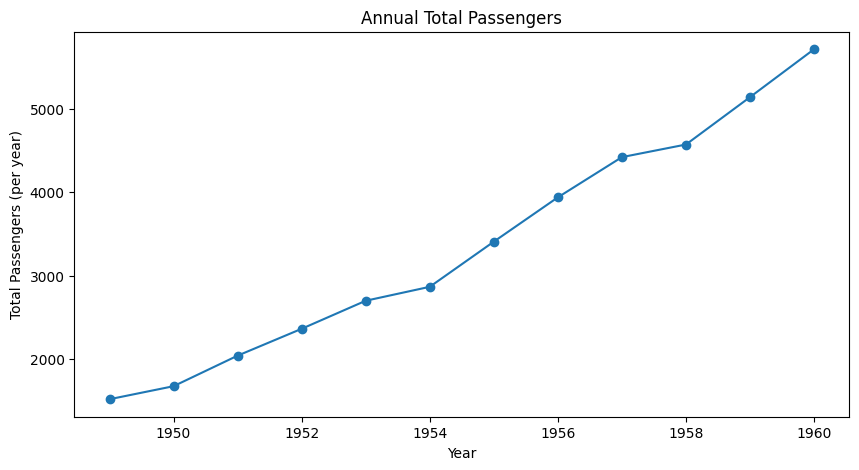

In [3]:
yearly_data = flights.groupby('year', as_index=False)['passengers'].sum()

plt.figure(figsize=(10, 5))
plt.plot(yearly_data['year'], yearly_data['passengers'], marker='o')
plt.title("Annual Total Passengers")
plt.xlabel("Year")
plt.ylabel("Total Passengers (per year)")
plt.show()

So, this airline experienced continuous growth every year from 1949 to 1960?

Let's dig into the data a little deeper with a month-by-month version of the plot to see what's really going on.

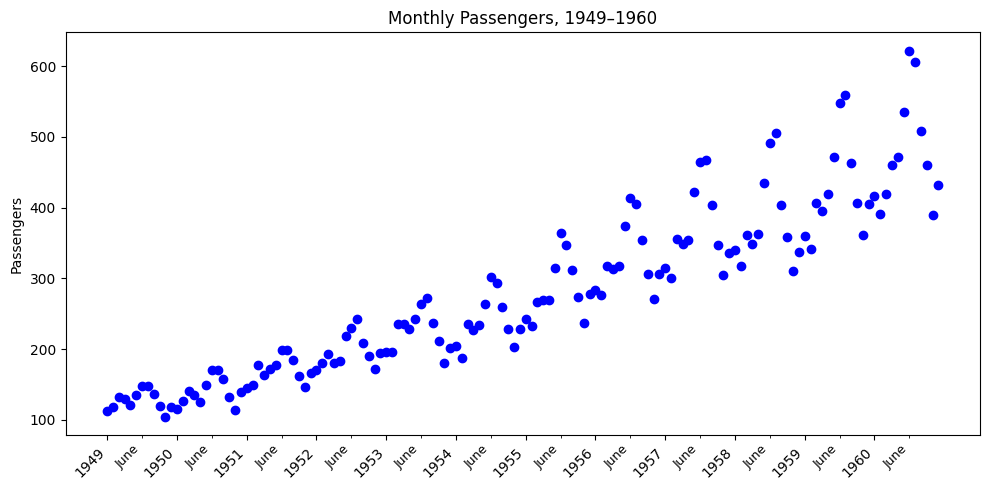

In [4]:
import matplotlib.pyplot as plt

data = [
    112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118,
    115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140,
    145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166,
    171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194,
    196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201,
    204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229,
    242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278,
    284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306,
    315, 301, 356, 348, 355, 422, 465, 467, 404, 347, 305, 336,
    340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337,
    360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405,
    417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432
]

x = list(range(len(data)))
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, data, color='blue')

# Major ticks (January) at multiples of 12; minor ticks (June) at January+5
jan_ticks = [(year - 1949)*12 for year in range(1949, 1961)]
june_ticks = [j+6 for j in jan_ticks]
ax.set_xticks(jan_ticks)
ax.set_xticklabels([str(year) for year in range(1949, 1961)], rotation=45, ha='right')
ax.set_xticks(june_ticks, minor=True)
ax.set_xticklabels(["June"]*len(june_ticks), minor=True, rotation=45, ha='right', fontsize=9)

plt.title("Monthly Passengers, 1949–1960")
plt.ylabel("Passengers")
plt.tight_layout()
plt.show()

## More complex visualization

It now looks like there is intense seasonal variation within each year of data. 

The first plot with only yearly data was quite deceptive. 

Can we make the plot even more informative by adding a dimension with color?

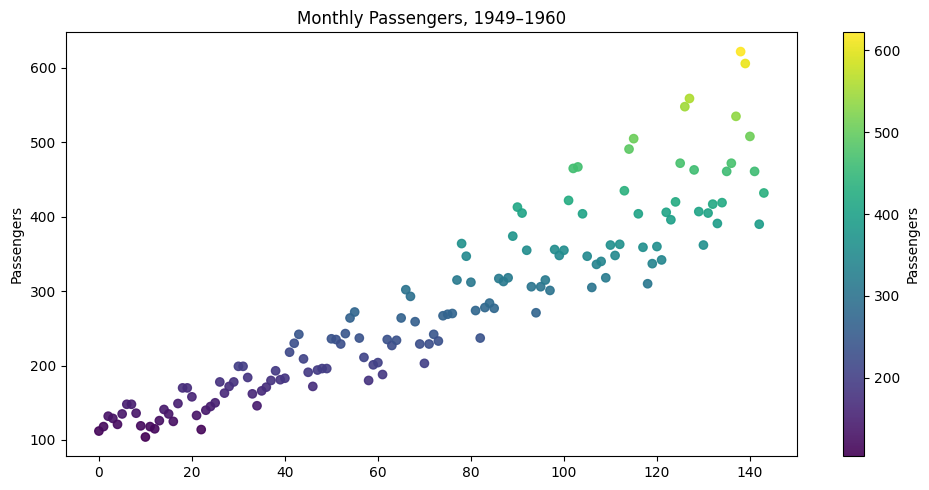

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
scatter = ax.scatter(x, data, c=data, cmap='viridis', alpha=0.9)

plt.colorbar(scatter, ax=ax, label="Passengers")
plt.title("Monthly Passengers, 1949–1960")
plt.ylabel("Passengers")
plt.tight_layout()
plt.show()

Adding color on an absolute scale doesn't really add much.

What about a relative scale within each year?

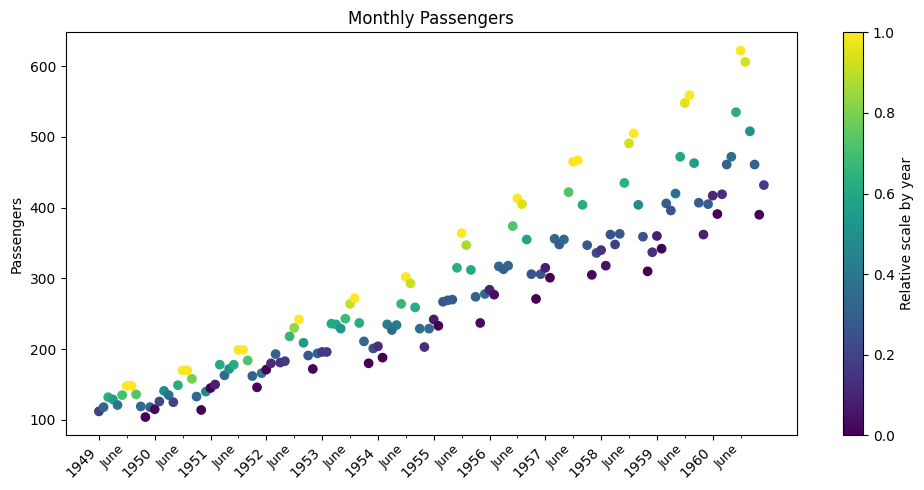

In [7]:
import matplotlib.pyplot as plt

# Scale each year’s data to [0..1]
year_minmax = {}
for y in range(1949, 1961):
    start = (y - 1949)*12
    subset = data[start:start+12]
    year_minmax[y] = (min(subset), max(subset))

colors = []
for i, val in enumerate(data):
    year = 1949 + i//12
    yr_min, yr_max = year_minmax[year]
    cval = (val - yr_min)/(yr_max - yr_min) if yr_max != yr_min else 0.5
    colors.append(cval)

x = list(range(len(data)))
fig, ax = plt.subplots(figsize=(10, 5))
scatter = ax.scatter(x, data, c=colors, cmap='viridis')
plt.colorbar(scatter, ax=ax, label="Relative scale by year")

# Mark January/June
jan_ticks = [(yr - 1949)*12 for yr in range(1949, 1961)]
june_ticks = [j+6 for j in jan_ticks]
ax.set_xticks(jan_ticks)
ax.set_xticklabels([str(yr) for yr in range(1949, 1961)], rotation=45, ha='right')
ax.set_xticks(june_ticks, minor=True)
ax.set_xticklabels(["June"]*len(june_ticks), minor=True, rotation=45, ha='right', fontsize=9)

plt.title("Monthly Passengers")
plt.ylabel("Passengers")
plt.tight_layout()
plt.show()

This looks more interesting and trends are easier to see. 

However, parsing specific data from this is difficult and it could lead to misinterpretation of trends. 

# Heatmap version

Lets try to present all of the possible data on one figure:

- Every year and month with numbers
- Color scaled on an absolute scale 

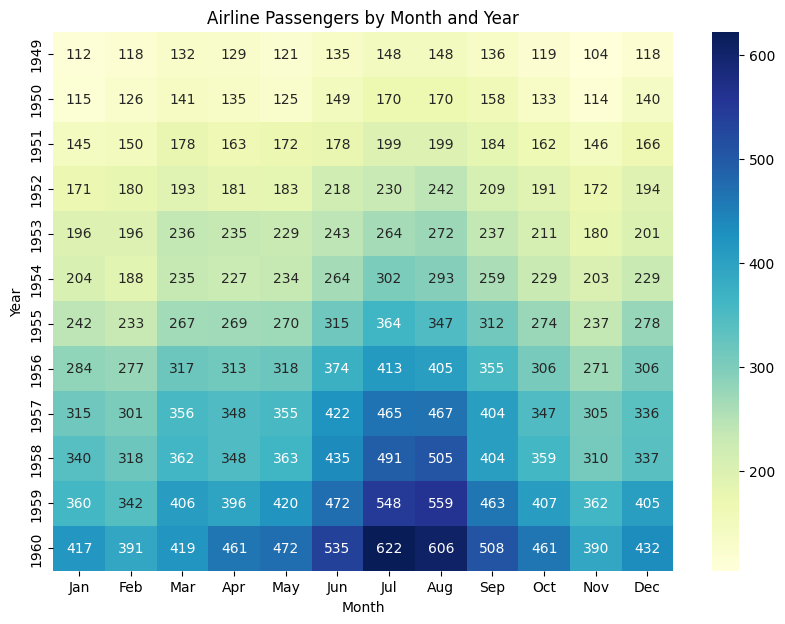

In [9]:
flights_pivot = flights.pivot(index="year", columns="month", values="passengers")
plt.figure(figsize=(10, 7))
sns.heatmap(flights_pivot, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Airline Passengers by Month and Year")
plt.ylabel("Year")
plt.xlabel("Month")
plt.show()